# Basics Notebook
This notebook will demonstrate how to use the fundamental features of geospacepy-lite

In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt


# Time conversion
The special_datetime module can convert between times from Python datetime to other time representations.

It's useful for it's own sake, but also, geospacepy-lite functions which requires times use Julian date.

There are two types of time conversion functions:
* Scalar functions - converts one datetime to or from another time type
* Vector functions - converts many datetimes (as a list or array) to or from another time type

In [2]:
from geospacepy.special_datetime import datetime2doy,datetimearr2doy

print('Scalar conversion')
dt = datetime.datetime(2020,1,1)
doy = datetime2doy(dt)
print(dt,'->',doy)

print('Vector conversion (from list to numpy array)')
dts = [dt+datetime.timedelta(hours=h) for h in range(3)]
doys = datetimearr2doy(dts)
print(dts,'->',doys)


Scalar conversion
2020-01-01 00:00:00 -> 1.0
Vector conversion (from list to numpy array)
[datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2020, 1, 1, 1, 0), datetime.datetime(2020, 1, 1, 2, 0)] -> [1.         1.04166667 1.08333333]


# Solar Position
Many types of analysis of geospatial data require knowing where the sun is relative to a position on the ground or in space.

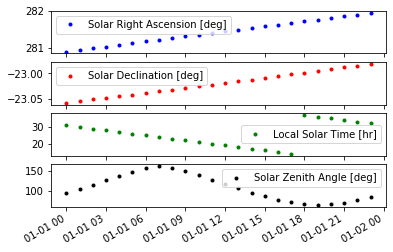

In [12]:
from geospacepy.special_datetime import datetimearr2jd
from geospacepy.sun import solar_position_almanac,local_mean_solar_time,solar_zenith_angle

dts = [datetime.datetime(2020,1,1)+datetime.timedelta(hours=h) for h in range(24)]
jds = datetimearr2jd(dts)

#Position of the sun in inertial frame (does not depend on earth's rotation)
ra_rad,dec_rad = solar_position_almanac(jds)

#The local solar time and solar zenith angle are representations of solar position that are relative to a particlar location
glat,glon = 40.01,-105.27 #Boulder, Colorado (geospacepy-lite uses west-longitudes-are-negative convention)
lsts = local_mean_solar_time(jds,glon)
szas_rad = solar_zenith_angle(jds,glat,glon)

#Geospacepy-lite functions return angles in radians (unless angle is a latitude or longitude [degrees],
#or a time, that can also be understood as an angle, e.g. local solar time [hours])

f,axs = plt.subplots(4,1)
axs[0].plot(dts,np.degrees(ra_rad),'b.',label='Solar Right Ascension [deg]')
axs[1].plot(dts,np.degrees(dec_rad),'r.',label='Solar Declination [deg]')
axs[2].plot(dts,lsts/np.pi*12,'g.',label='Local Solar Time [hr]')
axs[3].plot(dts,np.degrees(szas_rad),'k.',label='Solar Zenith Angle [deg]')

for ax in axs:
    ax.legend()
    
f.autofmt_xdate()
plt.show()